In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
nba_data = '../Potential Data Sets/NBA Free Throw Data.csv'
nba_data_df = pd.read_csv(nba_data)

In [3]:
# Clean-up team names to current name to combine accurately 
nba_data_df['Team'].replace({'Charlotte Bobcats':'Charlotte Hornets', 'New Orleans Hornets': 'New Orleans Pelicans', 'Los Angeles Clippers': 'LA Clippers'},inplace=True)
nba_data_df.head

<bound method NDFrame.head of                        Team   Season Venue  Wins  Loss   Win%  FT Made  \
0             Atlanta Hawks  2012-13  Home    25    16  0.610      595   
1            Boston Celtics  2012-13  Home    27    13  0.675      675   
2             Brooklyn Nets  2012-13  Home    26    15  0.634      724   
3         Charlotte Hornets  2012-13  Home    15    26  0.366      823   
4             Chicago Bulls  2012-13  Home    24    17  0.585      685   
5       Cleveland Cavaliers  2012-13  Home    14    27  0.341      707   
6          Dallas Mavericks  2012-13  Home    24    17  0.585      678   
7            Denver Nuggets  2012-13  Home    38     3  0.927      766   
8           Detroit Pistons  2012-13  Home    18    23  0.439      638   
9     Golden State Warriors  2012-13  Home    28    13  0.683      704   
10          Houston Rockets  2012-13  Home    29    12  0.707      826   
11           Indiana Pacers  2012-13  Home    30    11  0.732      752   
12      

In [21]:
teams_data = nba_data_df.groupby('Team')

In [30]:
teams_data_df = pd.DataFrame({'FT Successful': teams_data['FT Made'].sum(), 'FT Attempted': teams_data['FT Att'].sum(),\
                              'Successful FT %': round(teams_data['FT Made'].sum()/teams_data['FT Att'].sum()*100,2),\
                             'Win Rank': round(teams_data['Win Rnk'].mean(),0), 'FT Successful Rank':\
                             round(teams_data['FT Made Rnk'].mean(),0), 'FT Attempted Rank': round(teams_data['FT ATT Rnk'].mean(),0),\
                             'Total Points': teams_data['Total Points'].sum()})
teams_data_df

,FT Successful,FT Attempted,Successful FT %,Win Rank,FT Successful Rank,FT Attempted Rank,Total Points
Team,,,,,,,
Atlanta Hawks,18730,24656,75.97,15.0,20.0,19.0,118286
Boston Celtics,19064,24344,78.31,12.0,20.0,21.0,118138
Brooklyn Nets,20238,26764,75.62,19.0,12.0,12.0,116828
Charlotte Hornets,21308,27730,76.84,19.0,8.0,10.0,116034
Chicago Bulls,19512,24982,78.10,16.0,17.0,20.0,114220
Cleveland Cavaliers,19598,25770,76.05,14.0,17.0,16.0,118996
Dallas Mavericks,18812,24250,77.58,17.0,19.0,21.0,117818
Denver Nuggets,20484,27476,74.55,14.0,12.0,11.0,121758
Detroit Pistons,18246,25902,70.44,19.0,23.0,16.0,115584


In [6]:
#Verify total team number correct 
print(len(teams_data_df))

30


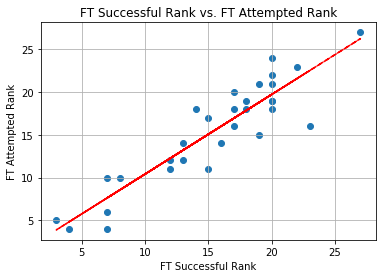

In [9]:
#supporting evidence

# plt.scatter(teams_data_df['FT Successful Rank'], teams_data_df['FT Attempted Rank'],marker ="o")

x = teams_data_df['FT Successful Rank']
y = teams_data_df['FT Attempted Rank']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('FT Successful Rank vs. FT Attempted Rank')
plt.xlabel('FT Successful Rank')
plt.ylabel('FT Attempted Rank')

plt.grid()
plt.savefig('Successful vs. Attempted.png')
plt.show()

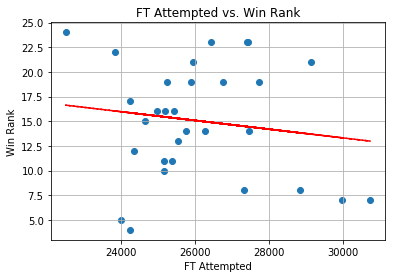

In [12]:
#not supporting evidence

# plt.scatter(teams_data_df['FT Attempted'], teams_data_df['Total Points'],marker ="o")
x = teams_data_df['FT Attempted']
y = teams_data_df['Win Rank']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('FT Attempted vs. Win Rank')
plt.xlabel('FT Attempted')
plt.ylabel('Win Rank')
plt.grid()
plt.savefig('Attempts vs. Win Rank.png')
plt.show()

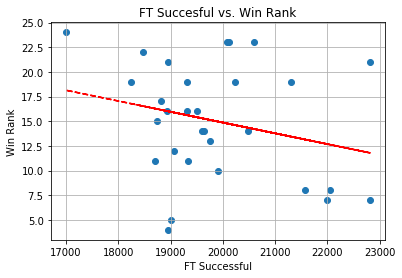

In [13]:
# not supporting evidence

# plt.scatter(teams_data_df['FT Successful'], teams_data_df['Total Points'],marker ="o")
x = teams_data_df['FT Successful']
y = teams_data_df['Win Rank']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('FT Succesful vs. Win Rank')
plt.xlabel('FT Successful')
plt.ylabel('Win Rank')
plt.grid()
plt.savefig('Successful FTs vs. Win Rank.png')
plt.show()

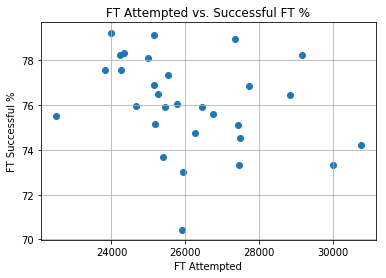

In [52]:
# not supporting evidence

plt.scatter(teams_data_df['FT Attempted'], teams_data_df['Successful FT %'],marker ="o")
plt.title('FT Attempted vs. Successful FT %')
plt.xlabel('FT Attempted')
plt.ylabel('FT Successful %')
plt.grid()
plt.savefig('FT Attempted vs. FT Successful %.png')
plt.show()

In [58]:
teams_data_df.sort_values(by='Successful FT %', ascending=False)

,FT Successful,FT Attempted,Successful FT %,Win Rank,FT Successful Rank,FT Attempted Rank,Total Points
Team,,,,,,,
San Antonio Spurs,19008,23988,79.24,5.0,20.0,24.0,120076
Portland Trail Blazers,19906,25160,79.12,10.0,14.0,18.0,120716
Toronto Raptors,21576,27334,78.93,8.0,7.0,10.0,120580
Boston Celtics,19064,24344,78.31,12.0,20.0,21.0,118138
Minnesota Timberwolves,22810,29156,78.23,21.0,3.0,5.0,119144
Golden State Warriors,18954,24228,78.23,4.0,20.0,22.0,126758
Chicago Bulls,19512,24982,78.10,16.0,17.0,20.0,114220
Dallas Mavericks,18812,24250,77.58,17.0,19.0,21.0,117818
New York Knicks,18478,23828,77.55,22.0,22.0,23.0,114558


In [16]:
home_df = nba_data_df[nba_data_df['Venue'] == 'Home']
away_df = nba_data_df[nba_data_df['Venue'] == 'Road']

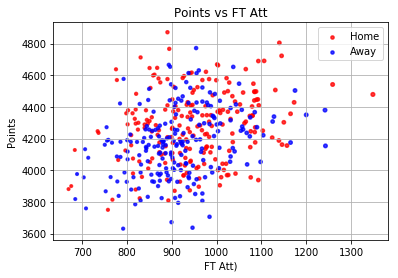

In [24]:
plt.scatter(home_df['FT Att'], home_df['Total Points'], label = 'Home', s= home_df['FT Att'] *.01,\
            color=["red"], edgecolor="red", alpha = .75, marker="o", linewidths=1.5)
plt.scatter(away_df['FT Att'], away_df['Total Points'], label = 'Away', s=away_df['FT Att'] *0.01, \
            color=["blue"], edgecolor="blue", alpha = .75, marker="o", linewidths=1.5)
plt.title('Points vs FT Att')
plt.xlabel('FT Att)')
plt.ylabel('Points')

# # Create a legend

plt.legend()
plt.grid()
# Incorporate a text label regarding circle size

plt.show()